Number of CSV files: 4
Shape of movies.csv: (9742, 3)
Shape of ratings.csv: (100836, 4)
Number of unique userId in ratings.csv: 610
Movie with maximum number of user ratings: Forrest Gump (1994)
Tags for "Matrix, The (1999)": ['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']
Average user rating for "Terminator 2: Judgment Day (1991)": 3.97


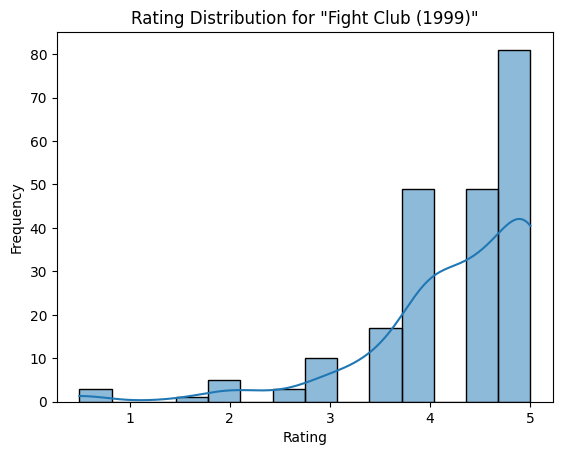

In [1]:
import pandas as pd

# Load the datasets
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')

# 1. How many ".csv" files are available in the dataset?
num_csv_files = len(['movies.csv', 'ratings.csv', 'tags.csv', 'links.csv'])
print(f'Number of CSV files: {num_csv_files}')

# 2. What is the shape of "movies.csv"?
print(f'Shape of movies.csv: {movies.shape}')

# 3. What is the shape of "ratings.csv"?
print(f'Shape of ratings.csv: {ratings.shape}')

# 4. How many unique "userId" are available in "ratings.csv"?
unique_users = ratings['userId'].nunique()
print(f'Number of unique userId in ratings.csv: {unique_users}')

# 5. Which movie has received the maximum number of user ratings?
most_rated_movie_id = ratings['movieId'].value_counts().idxmax()
most_rated_movie = movies[movies['movieId'] == most_rated_movie_id]['title'].values[0]
print(f'Movie with maximum number of user ratings: {most_rated_movie}')

# 6. Select all the correct tags submitted by users to "Matrix, The (1999)" movie
matrix_movie_id = movies[movies['title'] == 'Matrix, The (1999)']['movieId'].values[0]
matrix_tags = tags[tags['movieId'] == matrix_movie_id]['tag'].unique()
print(f'Tags for "Matrix, The (1999)": {matrix_tags}')

# 7. What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?
terminator_movie_id = movies[movies['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]
average_rating = ratings[ratings['movieId'] == terminator_movie_id]['rating'].mean()
print(f'Average user rating for "Terminator 2: Judgment Day (1991)": {average_rating:.2f}')

# 8. How does the data distribution of user ratings for "Fight Club (1999)" movie look like?
fight_club_movie_id = movies[movies['title'] == 'Fight Club (1999)']['movieId'].values[0]
fight_club_ratings = ratings[ratings['movieId'] == fight_club_movie_id]['rating']

# Importing necessary library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(fight_club_ratings, kde=True)
plt.title('Rating Distribution for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [3]:
import pandas as pd

# Load the datasets
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

# Mandatory Operation 1: Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.
grouped_ratings = ratings.groupby('movieId').agg(count=('rating', 'count'), mean=('rating', 'mean'))

# Mandatory Operation 2: Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
movies_with_ratings = pd.merge(movies, grouped_ratings, on='movieId', how='inner')

# Mandatory Operation 3: Filter only those movies which have more than 50 user ratings (i.e. > 50).
filtered_movies = movies_with_ratings[movies_with_ratings['count'] > 50]

# Q1: Which movie is the most popular based on average user ratings?
most_popular_movie = filtered_movies.loc[filtered_movies['mean'].idxmax()]['title']
print(f'Most popular movie based on average user ratings: {most_popular_movie}')

# Q2: Select all the correct options which come under the top 5 popular movies based on the number of user ratings.
top_5_movies_by_rating_count = filtered_movies.sort_values(by='count', ascending=False).head(5)['title'].values
print(f'Top 5 popular movies based on the number of user ratings: {top_5_movies_by_rating_count}')

# Q3: Which Sci-Fi movie is the "third most popular" based on the number of user ratings?
# Filter Sci-Fi movies first
sci_fi_movies = filtered_movies[filtered_movies['title'].str.contains('Sci-Fi', case=False)]

# Check if there are at least 3 Sci-Fi movies
if len(sci_fi_movies) >= 3:
    third_most_popular_sci_fi = sci_fi_movies.sort_values(by='count', ascending=False).iloc[2]['title']
    print(f'Third most popular Sci-Fi movie based on the number of user ratings: {third_most_popular_sci_fi}')
else:
    print('There are fewer than 3 Sci-Fi movies with more than 50 ratings.')


Most popular movie based on average user ratings: Shawshank Redemption, The (1994)
Top 5 popular movies based on the number of user ratings: ['Forrest Gump (1994)' 'Shawshank Redemption, The (1994)'
 'Pulp Fiction (1994)' 'Silence of the Lambs, The (1991)'
 'Matrix, The (1999)']
There are fewer than 3 Sci-Fi movies with more than 50 ratings.


In [5]:
links = pd.read_csv('links.csv')
print(links.columns)


Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')


In [6]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Load the datasets
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
links = pd.read_csv('links.csv')

# Mandatory Operation 1: Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.
grouped_ratings = ratings.groupby('movieId').agg(count=('rating', 'count'), mean=('rating', 'mean'))

# Mandatory Operation 2: Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
movies_with_ratings = pd.merge(movies, grouped_ratings, on='movieId', how='inner')

# Mandatory Operation 3: Filter only those movies which have more than 50 user ratings (i.e. > 50).
filtered_movies = movies_with_ratings[movies_with_ratings['count'] > 50]

# Define a function to get IMDB rating from imdbId
def get_imdb_rating(imdb_id):
    imdb_link = f'https://www.imdb.com/title/tt{imdb_id}/'
    try:
        response = requests.get(imdb_link)
        soup = BeautifulSoup(response.content, 'html.parser')
        rating = soup.find('span', itemprop='ratingValue').text
        return float(rating)
    except Exception as e:
        print(f"Error scraping {imdb_link}: {e}")
        return None

# Add IMDB rating to the filtered movies dataframe
filtered_movies['IMDB_Rating'] = filtered_movies['movieId'].map(
    lambda x: get_imdb_rating(links.loc[links['movieId'] == x, 'imdbId'].values[0])
)

# Find the movie with the highest IMDB rating
highest_imdb_movie = filtered_movies.loc[filtered_movies['IMDB_Rating'].idxmax()]
highest_imdb_movie_id = highest_imdb_movie['movieId']
print(f"Movie ID with the highest IMDB rating: {highest_imdb_movie_id}")

# Filter for Sci-Fi movies and find the highest IMDB rating
sci_fi_movies = filtered_movies[filtered_movies['title'].str.contains('Sci-Fi', case=False)]
if len(sci_fi_movies) > 0:
    highest_sci_fi_imdb_movie = sci_fi_movies.loc[sci_fi_movies['IMDB_Rating'].idxmax()]
    highest_sci_fi_imdb_movie_id = highest_sci_fi_imdb_movie['movieId']
    print(f"Sci-Fi movie ID with the highest IMDB rating: {highest_sci_fi_imdb_movie_id}")
else:
    print('There are no Sci-Fi movies with more than 50 ratings.')


Error scraping https://www.imdb.com/title/tt114709/: 'NoneType' object has no attribute 'text'
Error scraping https://www.imdb.com/title/tt113497/: 'NoneType' object has no attribute 'text'
Error scraping https://www.imdb.com/title/tt113228/: 'NoneType' object has no attribute 'text'
Error scraping https://www.imdb.com/title/tt113277/: 'NoneType' object has no attribute 'text'
Error scraping https://www.imdb.com/title/tt114319/: 'NoneType' object has no attribute 'text'
Error scraping https://www.imdb.com/title/tt113189/: 'NoneType' object has no attribute 'text'
Error scraping https://www.imdb.com/title/tt112346/: 'NoneType' object has no attribute 'text'
Error scraping https://www.imdb.com/title/tt112641/: 'NoneType' object has no attribute 'text'
Error scraping https://www.imdb.com/title/tt114388/: 'NoneType' object has no attribute 'text'
Error scraping https://www.imdb.com/title/tt112281/: 'NoneType' object has no attribute 'text'
Error scraping https://www.imdb.com/title/tt113161

C:\Users\V. EBONICA SALETH\AppData\Local\Temp\ipykernel_27576\3297051249.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_movies['IMDB_Rating'] = filtered_movies['movieId'].map(
C:\Users\V. EBONICA SALETH\AppData\Local\Temp\ipykernel_27576\3297051249.py:37: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  highest_imdb_movie = filtered_movies.loc[filtered_movies['IMDB_Rating'].idxmax()]


KeyError: nan